# Data preparation


In [1]:
!pip install requests

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt
import keras
import zipfile
import time
import os
import math
import datetime
import pandas as pd
import pickle
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import logging
import imblearn
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from datetime import datetime, timedelta
from datetime import date
from dateutil import relativedelta
from io import StringIO
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.utils import shuffle
from io import StringIO
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline 
from subprocess import check_output
from IPython.display import display
from colorama import Fore, Back, Style
from scipy.stats import pearsonr

In [3]:
Months = ["Jan ", "Feb ", "Mar ", "Apr ", "May ", "Jun ", "July ", "Aug ", "Sept ", "Oct ", "Nov ", "Dec "]
Years = [ "2014" , "2015" , "2016" , "2017"]

for year in Years:
    for month in Months:
        file = 'data/ttc-streetcar-delay-data-' + year + '.xlsx'
        sheet =  month + year
        if( year == "2014"  and  month == "Jan " ): 
            data_original = pd.read_excel( file ,  sheet)
            print( "Podaci iz " + file + " , " + sheet + '  su ucitani')
        if( year == "2017"  and  month == "Sept " ): 
            # print(Fore.RED + 'Podaci iz ' + file + " , " + sheet + '  nisu ucitani')
            # print(Style.RESET_ALL)
            print( "Podaci iz " + file + " , " + sheet + '  nisu ucitani')
        else:
            data_original = data_original.append(pd.read_excel( file ,  sheet))
            print( "Podaci iz " + file + " , " + sheet + '  su ucitani')
          

Podaci iz data/ttc-streetcar-delay-data-2014.xlsx , Jan 2014  su ucitani
Podaci iz data/ttc-streetcar-delay-data-2014.xlsx , Jan 2014  su ucitani
Podaci iz data/ttc-streetcar-delay-data-2014.xlsx , Feb 2014  su ucitani
Podaci iz data/ttc-streetcar-delay-data-2014.xlsx , Mar 2014  su ucitani
Podaci iz data/ttc-streetcar-delay-data-2014.xlsx , Apr 2014  su ucitani
Podaci iz data/ttc-streetcar-delay-data-2014.xlsx , May 2014  su ucitani
Podaci iz data/ttc-streetcar-delay-data-2014.xlsx , Jun 2014  su ucitani
Podaci iz data/ttc-streetcar-delay-data-2014.xlsx , July 2014  su ucitani
Podaci iz data/ttc-streetcar-delay-data-2014.xlsx , Aug 2014  su ucitani
Podaci iz data/ttc-streetcar-delay-data-2014.xlsx , Sept 2014  su ucitani
Podaci iz data/ttc-streetcar-delay-data-2014.xlsx , Oct 2014  su ucitani
Podaci iz data/ttc-streetcar-delay-data-2014.xlsx , Nov 2014  su ucitani
Podaci iz data/ttc-streetcar-delay-data-2014.xlsx , Dec 2014  su ucitani
Podaci iz data/ttc-streetcar-delay-data-2015.xlsx

In [4]:
data_original

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,Dundas and Roncesvalles,Late Leaving Garage,4.0,8.0,E/B,4018.0
1,2014-01-02,504,12:43:00,Thursday,King and Shaw,Utilized Off Route,20.0,22.0,E/B,4128.0
2,2014-01-02,501,14:01:00,Thursday,Kingston road and Bingham,Held By,13.0,19.0,W/B,4016.0
3,2014-01-02,504,14:22:00,Thursday,King St. and Roncesvalles Ave.,Investigation,7.0,11.0,W/B,4175.0
4,2014-01-02,504,16:42:00,Thursday,King and Bathurst,Utilized Off Route,3.0,6.0,E/B,4080.0
...,...,...,...,...,...,...,...,...,...,...
1693,2017-12-31,501,19:58:00,Sunday,Queen,General Delay,7.0,15.0,B/W,NaN
1694,2017-12-31,501,21:15:00,Sunday,Queen and Neville park,Mechanical,12.0,24.0,W/B,4110.0
1695,2017-12-31,501,21:44:00,Sunday,Queen and Dufferin,Mechanical,12.0,24.0,W/B,1419.0
1696,2017-12-31,510,22:15:00,Sunday,Spadina and King,Mechanical,5.0,10.0,S/B,4447.0


In [5]:
data = data_original

In [6]:
data

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,Dundas and Roncesvalles,Late Leaving Garage,4.0,8.0,E/B,4018.0
1,2014-01-02,504,12:43:00,Thursday,King and Shaw,Utilized Off Route,20.0,22.0,E/B,4128.0
2,2014-01-02,501,14:01:00,Thursday,Kingston road and Bingham,Held By,13.0,19.0,W/B,4016.0
3,2014-01-02,504,14:22:00,Thursday,King St. and Roncesvalles Ave.,Investigation,7.0,11.0,W/B,4175.0
4,2014-01-02,504,16:42:00,Thursday,King and Bathurst,Utilized Off Route,3.0,6.0,E/B,4080.0
...,...,...,...,...,...,...,...,...,...,...
1693,2017-12-31,501,19:58:00,Sunday,Queen,General Delay,7.0,15.0,B/W,NaN
1694,2017-12-31,501,21:15:00,Sunday,Queen and Neville park,Mechanical,12.0,24.0,W/B,4110.0
1695,2017-12-31,501,21:44:00,Sunday,Queen and Dufferin,Mechanical,12.0,24.0,W/B,1419.0
1696,2017-12-31,510,22:15:00,Sunday,Spadina and King,Mechanical,5.0,10.0,S/B,4447.0


In [7]:
data = data.drop(columns=['Location'])

In [8]:
data['Min Delay'].value_counts()

5.0      8004
6.0      6514
4.0      6500
10.0     3399
3.0      2622
         ... 
290.0       1
218.0       1
533.0       1
225.0       1
639.0       1
Name: Min Delay, Length: 334, dtype: int64

In [9]:
data['Incident'].value_counts()

Mechanical               25547
Investigation             6543
Held By                   5889
Late Leaving Garage       5195
General Delay             3333
Utilized Off Route        1722
Emergency Services        1361
Diversion                  776
Overhead - Pantograph        8
Name: Incident, dtype: int64

In [10]:
data

,Report Date,Route,Time,Day,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,Late Leaving Garage,4.0,8.0,E/B,4018.0
1,2014-01-02,504,12:43:00,Thursday,Utilized Off Route,20.0,22.0,E/B,4128.0
2,2014-01-02,501,14:01:00,Thursday,Held By,13.0,19.0,W/B,4016.0
3,2014-01-02,504,14:22:00,Thursday,Investigation,7.0,11.0,W/B,4175.0
4,2014-01-02,504,16:42:00,Thursday,Utilized Off Route,3.0,6.0,E/B,4080.0
...,...,...,...,...,...,...,...,...,...
1693,2017-12-31,501,19:58:00,Sunday,General Delay,7.0,15.0,B/W,NaN
1694,2017-12-31,501,21:15:00,Sunday,Mechanical,12.0,24.0,W/B,4110.0
1695,2017-12-31,501,21:44:00,Sunday,Mechanical,12.0,24.0,W/B,1419.0
1696,2017-12-31,510,22:15:00,Sunday,Mechanical,5.0,10.0,S/B,4447.0


In [11]:
data[data['Min Delay'] == 0.0]

,Report Date,Route,Time,Day,Incident,Min Delay,Min Gap,Direction,Vehicle
65,2014-01-03,506,12:14:00,Friday,Investigation,0.0,0.0,W/B,4125.0
96,2014-01-07,511,04:55:00,Tuesday,Held By,0.0,10.0,N/B,4136.0
186,2014-01-07,508,15:48:00,Tuesday,Mechanical,0.0,15.0,E/B,NaN
260,2014-01-08,508,15:48:00,Wednesday,Mechanical,0.0,15.0,E/B,NaN
287,2014-01-16,512,17:24:00,Thursday,Investigation,0.0,0.0,W/B,4118.0
...,...,...,...,...,...,...,...,...,...
1527,2017-12-29,505,05:09:00,Friday,Mechanical,0.0,0.0,E/B,NaN
1528,2017-12-29,505,05:13:00,Friday,Mechanical,0.0,0.0,E/B,NaN
1530,2017-12-29,505,05:17:00,Friday,Mechanical,0.0,0.0,E/B,NaN
1533,2017-12-29,505,05:25:00,Friday,Mechanical,0.0,0.0,E/B,NaN


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50374 entries, 0 to 1697
Data columns (total 9 columns):
Report Date    50374 non-null datetime64[ns]
Route          50374 non-null int64
Time           50374 non-null object
Day            50374 non-null object
Incident       50374 non-null object
Min Delay      50362 non-null float64
Min Gap        50360 non-null float64
Direction      50298 non-null object
Vehicle        46481 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
# If one intends to keep the same variable name, don't forget the inplace=True (this performs the operation in-place)
# data.sort_values(by=['Min_Delay'], ascending=False, inplace=True)
#data_sorted_by_Min_Delay = data.sort_values(by=['Min Delay'], ascending=False)
#data_sorted_by_Min_Delay

In [14]:
# Delete all data from Data Frame data 
# data = data[0:0] 
# data

In [15]:
data.isnull().values.any()

True

In [16]:
data = data.dropna()

In [17]:
data.isnull().values.any()

False

In [18]:
data.shape

(46424, 9)

In [19]:
data

,Report Date,Route,Time,Day,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,Late Leaving Garage,4.0,8.0,E/B,4018.0
1,2014-01-02,504,12:43:00,Thursday,Utilized Off Route,20.0,22.0,E/B,4128.0
2,2014-01-02,501,14:01:00,Thursday,Held By,13.0,19.0,W/B,4016.0
3,2014-01-02,504,14:22:00,Thursday,Investigation,7.0,11.0,W/B,4175.0
4,2014-01-02,504,16:42:00,Thursday,Utilized Off Route,3.0,6.0,E/B,4080.0
...,...,...,...,...,...,...,...,...,...
1692,2017-12-31,505,17:42:00,Sunday,Held By,8.0,16.0,E/B,4164.0
1694,2017-12-31,501,21:15:00,Sunday,Mechanical,12.0,24.0,W/B,4110.0
1695,2017-12-31,501,21:44:00,Sunday,Mechanical,12.0,24.0,W/B,1419.0
1696,2017-12-31,510,22:15:00,Sunday,Mechanical,5.0,10.0,S/B,4447.0


In [21]:
data['Vehicle'] = data['Vehicle'].astype(int)
data['Min Gap'] = data['Min Gap'].astype(int)
data['Min Delay'] = data['Min Delay'].astype(int)

C:\Users\Korisnik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Korisnik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Korisnik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [22]:
data

,Report Date,Route,Time,Day,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,Late Leaving Garage,4,8,E/B,4018
1,2014-01-02,504,12:43:00,Thursday,Utilized Off Route,20,22,E/B,4128
2,2014-01-02,501,14:01:00,Thursday,Held By,13,19,W/B,4016
3,2014-01-02,504,14:22:00,Thursday,Investigation,7,11,W/B,4175
4,2014-01-02,504,16:42:00,Thursday,Utilized Off Route,3,6,E/B,4080
...,...,...,...,...,...,...,...,...,...
1692,2017-12-31,505,17:42:00,Sunday,Held By,8,16,E/B,4164
1694,2017-12-31,501,21:15:00,Sunday,Mechanical,12,24,W/B,4110
1695,2017-12-31,501,21:44:00,Sunday,Mechanical,12,24,W/B,1419
1696,2017-12-31,510,22:15:00,Sunday,Mechanical,5,10,S/B,4447


## Clean up Route

In [23]:
valid_routes = ['501','502','503','504','505','506','509','510','511','512','301','304','306','310']

In [24]:
data['Route'].nunique()

93

In [25]:
data = data[data['Route'].isin(valid_routes)]

In [26]:
data['Route'].nunique()

14

In [27]:
data.shape

(45100, 9)

## Clean up Direction

The next part of the code modifies the data from the Direction column. Replaces E / B with e, W / B with w, S / B with s, N / B with n

In [29]:
print( "Direction count pre cleanup", data['Direction'].nunique() )

Direction count pre cleanup 75


In [30]:
# Code from cs228_project_Predicting_Streetcar_Delays

valid_directions = ['e','w','s','n','b']

def check_direction (x):
    if x in valid_directions:
        return(x)
    else:
        return("bad direction")
    

def direction_cleanup(df):
    
    df['Direction'] = df['Direction'].str.lower()
    df['Direction'] = df['Direction'].str.replace('/','')     
    df['Direction'] = df['Direction'].replace({'eastbound':'e','westbound':'w','southbound':'s','northbound':'n'})
    df['Direction'] = df['Direction'].replace( 'b','', regex = True )
    df['Direction'] = df['Direction'].apply( lambda x:check_direction(x) )
       
    return(df)

In [31]:
data = direction_cleanup(data)

C:\Users\Korisnik\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Korisnik\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\Korisnik\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [33]:
 print( "Direction count post cleanup", data['Direction'].nunique() )

Direction count post cleanup 5


In [34]:
data

,Report Date,Route,Time,Day,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,Late Leaving Garage,4,8,e,4018
1,2014-01-02,504,12:43:00,Thursday,Utilized Off Route,20,22,e,4128
2,2014-01-02,501,14:01:00,Thursday,Held By,13,19,w,4016
3,2014-01-02,504,14:22:00,Thursday,Investigation,7,11,w,4175
4,2014-01-02,504,16:42:00,Thursday,Utilized Off Route,3,6,e,4080
...,...,...,...,...,...,...,...,...,...
1692,2017-12-31,505,17:42:00,Sunday,Held By,8,16,e,4164
1694,2017-12-31,501,21:15:00,Sunday,Mechanical,12,24,w,4110
1695,2017-12-31,501,21:44:00,Sunday,Mechanical,12,24,w,1419
1696,2017-12-31,510,22:15:00,Sunday,Mechanical,5,10,s,4447


In [35]:
data[ data['Direction'].str.contains('bad direction') ]

,Report Date,Route,Time,Day,Incident,Min Delay,Min Gap,Direction,Vehicle
1218,2014-03-29,501,22:38:00,Saturday,Investigation,9,18,bad direction,4221
654,2014-04-16,512,11:05:00,Wednesday,Investigation,33,43,bad direction,4185
1083,2014-04-29,506,11:02:00,Tuesday,Mechanical,23,23,bad direction,4064
425,2014-05-14,501,16:39:00,Wednesday,Mechanical,6,12,bad direction,4233
672,2014-05-22,505,09:09:00,Thursday,Held By,5,10,bad direction,4019
1004,2014-06-26,504,18:49:00,Thursday,Investigation,31,34,bad direction,4062
297,2014-07-08,505,15:17:00,Tuesday,Investigation,55,65,bad direction,4164
422,2014-08-14,501,15:09:00,Thursday,Held By,14,24,bad direction,4215
241,2014-09-07,501,06:23:00,Sunday,Mechanical,5,11,bad direction,7957
897,2014-10-28,506,16:40:00,Tuesday,Held By,5,10,bad direction,4088


In [36]:
data = data[data['Direction'].isin(valid_directions)]

In [37]:
data[ data['Direction'].str.contains('bad direction') ].shape

(0, 9)

In [38]:
data

,Report Date,Route,Time,Day,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,Late Leaving Garage,4,8,e,4018
1,2014-01-02,504,12:43:00,Thursday,Utilized Off Route,20,22,e,4128
2,2014-01-02,501,14:01:00,Thursday,Held By,13,19,w,4016
3,2014-01-02,504,14:22:00,Thursday,Investigation,7,11,w,4175
4,2014-01-02,504,16:42:00,Thursday,Utilized Off Route,3,6,e,4080
...,...,...,...,...,...,...,...,...,...
1692,2017-12-31,505,17:42:00,Sunday,Held By,8,16,e,4164
1694,2017-12-31,501,21:15:00,Sunday,Mechanical,12,24,w,4110
1695,2017-12-31,501,21:44:00,Sunday,Mechanical,12,24,w,1419
1696,2017-12-31,510,22:15:00,Sunday,Mechanical,5,10,s,4447


In [39]:
print( "Direction count post cleanup bad direction", data['Direction'].unique() )
    

Direction count post cleanup bad direction ['e' 'w' 's' 'n']


In [40]:
data = pd.get_dummies(data, columns=['Direction'])

In [41]:
data = pd.get_dummies(data, columns=['Incident'])

In [42]:
data = pd.get_dummies(data, columns=['Day'])

In [43]:
data

,Report Date,Route,Time,Min Delay,Min Gap,Vehicle,Direction_e,Direction_n,Direction_s,Direction_w,...,Incident_Mechanical,Incident_Overhead - Pantograph,Incident_Utilized Off Route,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,2014-01-02,505,06:31:00,4,8,4018,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2014-01-02,504,12:43:00,20,22,4128,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2014-01-02,501,14:01:00,13,19,4016,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,2014-01-02,504,14:22:00,7,11,4175,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,2014-01-02,504,16:42:00,3,6,4080,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,2017-12-31,505,17:42:00,8,16,4164,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1694,2017-12-31,501,21:15:00,12,24,4110,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1695,2017-12-31,501,21:44:00,12,24,1419,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1696,2017-12-31,510,22:15:00,5,10,4447,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0



## Datum i Vreme

In [44]:
# Code from cs228_project_Predicting_Streetcar_Delays
#
# Dodavanje nove kolone Report Date Time koja sadrzi podatke iz kolone Report Date i Time
def replace_time(date_time_value,time_value):
    ''' given a datetime replace the time portion '''
     
    date_time_value = date_time_value.replace(hour=time_value.hour, minute=time_value.minute, second=time_value.second)
    return(date_time_value)


In [45]:
# Code from cs228_project_Predicting_Streetcar_Delays
#
data['Report Date Time'] = data.apply(lambda x: replace_time(x['Report Date'], x['Time']), axis=1)


In [46]:
data

,Report Date,Route,Time,Min Delay,Min Gap,Vehicle,Direction_e,Direction_n,Direction_s,Direction_w,...,Incident_Overhead - Pantograph,Incident_Utilized Off Route,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Report Date Time
0,2014-01-02,505,06:31:00,4,8,4018,1,0,0,0,...,0,0,0,0,0,0,1,0,0,2014-01-02 06:31:00
1,2014-01-02,504,12:43:00,20,22,4128,1,0,0,0,...,0,1,0,0,0,0,1,0,0,2014-01-02 12:43:00
2,2014-01-02,501,14:01:00,13,19,4016,0,0,0,1,...,0,0,0,0,0,0,1,0,0,2014-01-02 14:01:00
3,2014-01-02,504,14:22:00,7,11,4175,0,0,0,1,...,0,0,0,0,0,0,1,0,0,2014-01-02 14:22:00
4,2014-01-02,504,16:42:00,3,6,4080,1,0,0,0,...,0,1,0,0,0,0,1,0,0,2014-01-02 16:42:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,2017-12-31,505,17:42:00,8,16,4164,1,0,0,0,...,0,0,0,0,0,1,0,0,0,2017-12-31 17:42:00
1694,2017-12-31,501,21:15:00,12,24,4110,0,0,0,1,...,0,0,0,0,0,1,0,0,0,2017-12-31 21:15:00
1695,2017-12-31,501,21:44:00,12,24,1419,0,0,0,1,...,0,0,0,0,0,1,0,0,0,2017-12-31 21:44:00
1696,2017-12-31,510,22:15:00,5,10,4447,0,0,1,0,...,0,0,0,0,0,1,0,0,0,2017-12-31 22:15:00


In [47]:
# Creating the year column form date time stamp.
data['year'] = data['Report Date Time'].dt.year

# Creating the month column form date time stamp.
data['month'] = data['Report Date Time'].dt.month

# Creating the day column form date time stamp.
data['day'] = data['Report Date Time'].dt.day

# Creating the hour column form date time stamp.
data['hour'] = data['Report Date Time'].dt.hour

In [48]:
data = data.drop(columns=['Report Date Time', 'Time', 'Report Date'])

In [49]:
data

,Route,Min Delay,Min Gap,Vehicle,Direction_e,Direction_n,Direction_s,Direction_w,Incident_Diversion,Incident_Emergency Services,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,year,month,day,hour
0,505,4,8,4018,1,0,0,0,0,0,...,0,0,0,1,0,0,2014,1,2,6
1,504,20,22,4128,1,0,0,0,0,0,...,0,0,0,1,0,0,2014,1,2,12
2,501,13,19,4016,0,0,0,1,0,0,...,0,0,0,1,0,0,2014,1,2,14
3,504,7,11,4175,0,0,0,1,0,0,...,0,0,0,1,0,0,2014,1,2,14
4,504,3,6,4080,1,0,0,0,0,0,...,0,0,0,1,0,0,2014,1,2,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,505,8,16,4164,1,0,0,0,0,0,...,0,0,1,0,0,0,2017,12,31,17
1694,501,12,24,4110,0,0,0,1,0,0,...,0,0,1,0,0,0,2017,12,31,21
1695,501,12,24,1419,0,0,0,1,0,0,...,0,0,1,0,0,0,2017,12,31,21
1696,510,5,10,4447,0,0,1,0,0,0,...,0,0,1,0,0,0,2017,12,31,22


Adding a Delay column that will have a value of 0 if the value in the Min Delay column is 0 otherwise it will have a value of 1. 0 means no delay. 1 means there are delays

In [50]:
data["Delay"] = [0 if x == 0 else 1 for x in data['Min Delay'] ]
# data['Delay'] = np.where(data['Min Delay'] == 0, 0, 1 )

In [51]:
data = data.drop(columns=['Min Delay'])

In [52]:
data

,Route,Min Gap,Vehicle,Direction_e,Direction_n,Direction_s,Direction_w,Incident_Diversion,Incident_Emergency Services,Incident_General Delay,...,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,year,month,day,hour,Delay
0,505,8,4018,1,0,0,0,0,0,0,...,0,0,1,0,0,2014,1,2,6,1
1,504,22,4128,1,0,0,0,0,0,0,...,0,0,1,0,0,2014,1,2,12,1
2,501,19,4016,0,0,0,1,0,0,0,...,0,0,1,0,0,2014,1,2,14,1
3,504,11,4175,0,0,0,1,0,0,0,...,0,0,1,0,0,2014,1,2,14,1
4,504,6,4080,1,0,0,0,0,0,0,...,0,0,1,0,0,2014,1,2,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,505,16,4164,1,0,0,0,0,0,0,...,0,1,0,0,0,2017,12,31,17,1
1694,501,24,4110,0,0,0,1,0,0,0,...,0,1,0,0,0,2017,12,31,21,1
1695,501,24,1419,0,0,0,1,0,0,0,...,0,1,0,0,0,2017,12,31,21,1
1696,510,10,4447,0,0,1,0,0,0,0,...,0,1,0,0,0,2017,12,31,22,1


In [53]:
data[data['Delay'] == 0.0].shape

(668, 28)

In [54]:
data[data['Delay'] == 1.0].shape

(44376, 28)

In [55]:
oversampling_set = data[data['Delay'] == 0.0]

In [56]:
for x in range(40):
    data  = data.append(oversampling_set)
    data = shuffle(data)

In [57]:
data = shuffle(data)

In [58]:
data[data['Delay'] == 0.0].shape

(27388, 28)

In [59]:
data[data['Delay'] == 1.0].shape

(44376, 28)

In [60]:
data

,Route,Min Gap,Vehicle,Direction_e,Direction_n,Direction_s,Direction_w,Incident_Diversion,Incident_Emergency Services,Incident_General Delay,...,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,year,month,day,hour,Delay
90,504,8,4144,0,1,0,0,0,0,0,...,0,0,0,0,0,2014,8,4,13,1
484,512,0,4071,0,0,1,0,0,0,0,...,0,0,0,0,0,2015,8,17,10,0
181,505,26,4148,0,0,0,1,0,1,0,...,0,0,1,0,0,2014,11,6,22,1
891,504,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,2016,10,24,16,0
774,504,14,4111,1,0,0,0,0,0,0,...,1,0,0,0,0,2016,12,17,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,510,6,7744,0,1,0,0,0,0,0,...,0,0,0,0,0,2015,4,20,15,1
1112,301,0,4205,0,0,0,1,0,0,0,...,0,0,1,0,0,2015,1,29,1,0
984,504,0,4084,1,0,0,0,0,0,0,...,0,0,0,0,0,2017,10,30,12,0
768,501,15,4246,1,0,0,0,0,0,1,...,0,0,0,1,0,2017,10,24,9,1


In [61]:
data.describe() 

,Route,Min Gap,Vehicle,Direction_e,Direction_n,Direction_s,Direction_w,Incident_Diversion,Incident_Emergency Services,Incident_General Delay,...,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,year,month,day,hour,Delay
count,71764.000000,71764.000000,71764.000000,71764.000000,71764.000000,71764.000000,71764.000000,71764.000000,71764.000000,71764.000000,...,71764.000000,71764.000000,71764.000000,71764.000000,71764.000000,71764.000000,71764.000000,71764.000000,71764.000000,71764.000000
mean,502.601541,12.235870,4300.262207,0.389039,0.101527,0.091564,0.417870,0.022114,0.028287,0.067652,...,0.112689,0.100928,0.171576,0.157934,0.148765,2015.570648,6.382476,15.855596,11.269230,0.618360
std,26.592786,30.306616,1435.476391,0.487536,0.302028,0.288412,0.493212,0.147056,0.165793,0.251150,...,0.316214,0.301236,0.377014,0.364682,0.355860,1.063608,3.412244,8.871006,5.721769,0.485792
min,301.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000,0.000000,0.000000
25%,503.000000,0.000000,4075.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,4.000000,8.000000,6.000000,0.000000
50%,505.000000,9.000000,4152.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,6.000000,16.000000,10.000000,1.000000
75%,510.000000,15.000000,4226.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,9.000000,24.000000,16.000000,1.000000
max,512.000000,4216.000000,163242.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2017.000000,12.000000,31.000000,23.000000,1.000000


In [62]:
data

,Route,Min Gap,Vehicle,Direction_e,Direction_n,Direction_s,Direction_w,Incident_Diversion,Incident_Emergency Services,Incident_General Delay,...,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,year,month,day,hour,Delay
90,504,8,4144,0,1,0,0,0,0,0,...,0,0,0,0,0,2014,8,4,13,1
484,512,0,4071,0,0,1,0,0,0,0,...,0,0,0,0,0,2015,8,17,10,0
181,505,26,4148,0,0,0,1,0,1,0,...,0,0,1,0,0,2014,11,6,22,1
891,504,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,2016,10,24,16,0
774,504,14,4111,1,0,0,0,0,0,0,...,1,0,0,0,0,2016,12,17,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,510,6,7744,0,1,0,0,0,0,0,...,0,0,0,0,0,2015,4,20,15,1
1112,301,0,4205,0,0,0,1,0,0,0,...,0,0,1,0,0,2015,1,29,1,0
984,504,0,4084,1,0,0,0,0,0,0,...,0,0,0,0,0,2017,10,30,12,0
768,501,15,4246,1,0,0,0,0,0,1,...,0,0,0,1,0,2017,10,24,9,1


In [63]:
count_no_delay = data[data['Delay']==0].shape[0]
count_delay = data[data['Delay']==1].shape[0]
print("count of no delay ",count_no_delay)
print("count of delay ",count_delay)
# define weighting factor for delay outcome
one_weight = count_no_delay/count_delay
print("one_weight is ",one_weight)

count of no delay  27388
count of delay  44376
one_weight is  0.617180457905174


In [64]:
for col in data.columns:
    print(col)

feature_names = data.columns
feature_names

Route
Min Gap
Vehicle
Direction_e
Direction_n
Direction_s
Direction_w
Incident_Diversion
Incident_Emergency Services
Incident_General Delay
Incident_Held By
Incident_Investigation
Incident_Late Leaving Garage
Incident_Mechanical
Incident_Overhead - Pantograph
Incident_Utilized Off Route
Day_Friday
Day_Monday
Day_Saturday
Day_Sunday
Day_Thursday
Day_Tuesday
Day_Wednesday
year
month
day
hour
Delay


Index(['Route', 'Min Gap', 'Vehicle', 'Direction_e', 'Direction_n',
       'Direction_s', 'Direction_w', 'Incident_Diversion',
       'Incident_Emergency Services', 'Incident_General Delay',
       'Incident_Held By', 'Incident_Investigation',
       'Incident_Late Leaving Garage', 'Incident_Mechanical',
       'Incident_Overhead - Pantograph', 'Incident_Utilized Off Route',
       'Day_Friday', 'Day_Monday', 'Day_Saturday', 'Day_Sunday',
       'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday', 'year', 'month', 'day',
       'hour', 'Delay'],
      dtype='object')

In [65]:
corrcoefs = data.corr()['Delay']
corrcoefs

Route                            -0.034326
Min Gap                           0.265103
Vehicle                           0.004636
Direction_e                       0.047951
Direction_n                      -0.086366
Direction_s                      -0.076805
Direction_w                       0.050401
Incident_Diversion               -0.073798
Incident_Emergency Services       0.006355
Incident_General Delay           -0.177046
Incident_Held By                  0.138944
Incident_Investigation           -0.055429
Incident_Late Leaving Garage      0.074620
Incident_Mechanical               0.059862
Incident_Overhead - Pantograph    0.007759
Incident_Utilized Off Route      -0.080408
Day_Friday                       -0.032250
Day_Monday                        0.023842
Day_Saturday                      0.001027
Day_Sunday                       -0.002265
Day_Thursday                     -0.019924
Day_Tuesday                      -0.001612
Day_Wednesday                     0.034289
year       

In [66]:
corrcoefs_for_barh = corrcoefs.drop('Delay')
corrcoefs_for_barh

Route                            -0.034326
Min Gap                           0.265103
Vehicle                           0.004636
Direction_e                       0.047951
Direction_n                      -0.086366
Direction_s                      -0.076805
Direction_w                       0.050401
Incident_Diversion               -0.073798
Incident_Emergency Services       0.006355
Incident_General Delay           -0.177046
Incident_Held By                  0.138944
Incident_Investigation           -0.055429
Incident_Late Leaving Garage      0.074620
Incident_Mechanical               0.059862
Incident_Overhead - Pantograph    0.007759
Incident_Utilized Off Route      -0.080408
Day_Friday                       -0.032250
Day_Monday                        0.023842
Day_Saturday                      0.001027
Day_Sunday                       -0.002265
Day_Thursday                     -0.019924
Day_Tuesday                      -0.001612
Day_Wednesday                     0.034289
year       

In [67]:
# corrcoefs = []
# for feature in data.columns:
#    corrcoef = np.corrcoef(data[feature].values, 'Delay')[0, 1]
#    corrcoefs.append(corrcoef)
#    print (feature, corrcoef)

IndexError: arrays used as indices must be of integer (or boolean) type

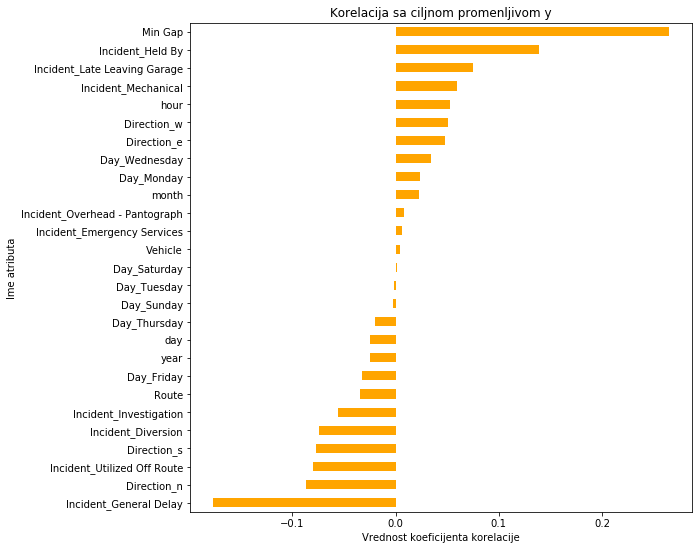

In [78]:
number_of_features = len(data.columns)

coefs_for_plot = pd.Series(corrcoefs_for_barh).sort_values()
coefs_for_plot.plot(kind = "barh", color = 'orange', figsize = (9, 9))


plt.title("Korelacija sa ciljnom promenljivom y")
plt.ylabel('Ime atributa')
plt.xlabel('Vrednost koeficijenta korelacije')
plt.yticks(np.arange(number_of_features), list(feature_names[coefs_for_plot.index]))
plt.plot()

In [69]:
y = data['Delay']
data = data.drop(columns=['Delay'])
X = data

In [70]:
wd = np.sum(y == 0)
d = np.sum(y == 1)
print('Delay: ', d, '  Without Delay: ', wd)

Delay:  44376   Without Delay:  27388


In [71]:
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)

In [72]:
wd = np.sum(y == 0)
d = np.sum(y == 1)
print('Delay: ', d, '  Without Delay: ', wd)

Delay:  44376   Without Delay:  27388


In [73]:
X.shape

(71764, 27)

In [74]:
X.corr()

,Route,Min Gap,Vehicle,Direction_e,Direction_n,Direction_s,Direction_w,Incident_Diversion,Incident_Emergency Services,Incident_General Delay,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,year,month,day,hour
Route,1.000000,-0.090504,0.000245,-0.009097,0.057361,0.064868,-0.064067,-0.063386,-0.108308,0.062304,...,0.023792,-0.070707,-0.056435,0.021291,-0.002606,0.036548,-0.014714,-0.021327,-0.008465,0.183255
Min Gap,-0.090504,1.000000,-0.013565,-0.012102,-0.050146,-0.035049,0.063166,0.096106,0.082464,-0.051873,...,-0.001098,0.009916,0.026646,-0.024368,0.013386,-0.003152,-0.010675,0.014280,-0.016062,0.031511
Vehicle,0.000245,-0.013565,1.000000,0.027262,0.022417,-0.012962,-0.033097,-0.018675,0.011248,-0.042870,...,0.006943,0.018381,0.020907,-0.035827,-0.001253,-0.002218,-0.101251,0.027281,-0.001541,0.047286
Direction_e,-0.009097,-0.012102,0.027262,1.000000,-0.268243,-0.253341,-0.676083,-0.017766,-0.018058,0.132493,...,0.017269,-0.019177,-0.031673,-0.005628,0.026227,0.017800,-0.039017,-0.032939,-0.015828,-0.048877
Direction_n,0.057361,-0.050146,0.022417,-0.268243,1.000000,-0.106722,-0.284806,-0.022628,-0.023682,-0.066302,...,-0.013773,-0.007157,-0.006182,-0.038806,0.016231,0.014663,0.027253,-0.033272,-0.031174,-0.045410
Direction_s,0.064868,-0.035049,-0.012962,-0.253341,-0.106722,1.000000,-0.268983,-0.007331,0.017813,-0.064166,...,-0.006135,0.009400,0.009592,-0.015305,-0.003416,0.019342,0.037943,0.029859,0.009672,0.050098
Direction_w,-0.064067,0.063166,-0.033097,-0.676083,-0.284806,-0.268983,1.000000,0.035705,0.021936,-0.052845,...,-0.005049,0.017842,0.029485,0.038277,-0.033866,-0.037885,-0.000308,0.035474,0.029079,0.046827
Incident_Diversion,-0.063386,0.096106,-0.018675,-0.017766,-0.022628,-0.007331,0.035705,1.000000,-0.025658,-0.040508,...,-0.005842,0.040803,0.045558,-0.033250,-0.029269,0.002905,0.022574,0.009053,-0.019674,-0.042947
Incident_Emergency Services,-0.108308,0.082464,0.011248,-0.018058,-0.023682,0.017813,0.021936,-0.025658,1.000000,-0.045960,...,0.001253,0.053224,-0.003874,-0.006086,0.005852,-0.026924,0.002812,0.029350,0.017273,0.013741
Incident_General Delay,0.062304,-0.051873,-0.042870,0.132493,-0.066302,-0.064166,-0.052845,-0.040508,-0.045960,1.000000,...,-0.012372,-0.046867,0.005340,0.022516,-0.007116,0.011966,-0.066015,-0.012308,0.014755,-0.080069


In [79]:
number_of_features = X.shape[1]

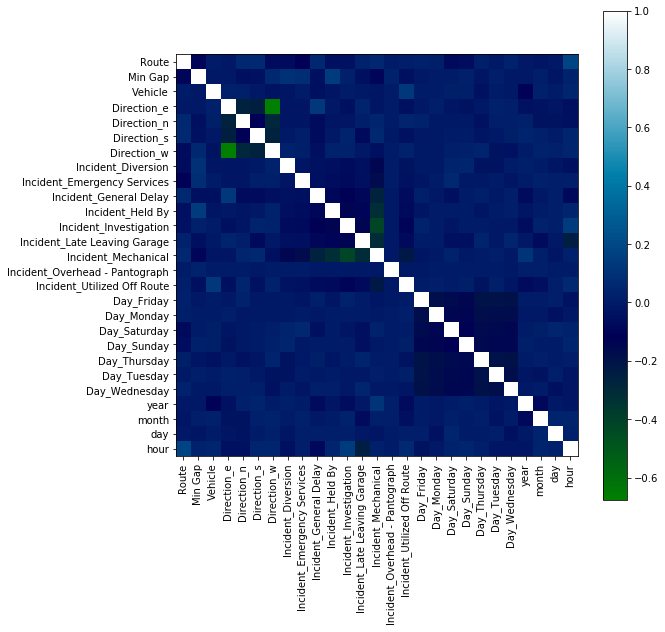

In [80]:
plt.figure(figsize = (9, 9))
plt.xticks(range(0, number_of_features), feature_names, rotation='vertical')
plt.yticks(range(0, number_of_features), feature_names)
plt.imshow(X.corr(), cmap='ocean')
plt.colorbar()
plt.show()

# Logistic regression

In [81]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets

In [82]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.33, random_state = 7, stratify = y)

In [83]:
X_train.shape

(48081, 27)

In [84]:
X_test.shape

(23683, 27)

In [85]:
 y_train.shape
    

(48081,)

In [86]:
y_test.shape

(23683,)

In [87]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
wd_train = np.sum(y_train == 0)
d_train = np.sum(y_train == 1)
print('Delay: ', d_train, '  Without Delay: ', wd_train)

Delay:  29731   Without Delay:  18350


In [89]:
wd_test = np.sum(y_test == 0)
d_test = np.sum(y_test == 1)
print('Delay: ', d_test, '  Without Delay: ', wd_test)

Delay:  14645   Without Delay:  9038


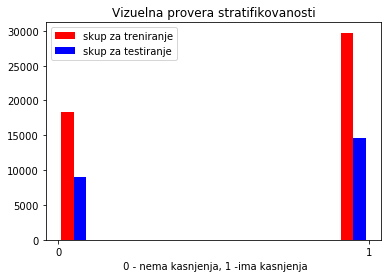

In [90]:
plt.title("Vizuelna provera stratifikovanosti")
plt.xticks([0,1])
plt.xlabel(' 0 - nema kasnjenja, 1 -ima kasnjenja')
plt.hist([y_train, y_test], color=['red', 'blue'], label=['skup za treniranje', 'skup za testiranje'])
plt.legend(loc='best')
plt.show()

## Učenje modela

In [91]:
model = linear_model.LogisticRegression(solver='lbfgs')

In [92]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
model.intercept_

array([2.030013])

In [94]:
model.coef_

array([[ 1.30023498e-01,  9.29687609e+00, -6.35276999e-03,
         6.62647944e-02, -5.88746611e-02, -3.30967141e-02,
        -1.00344799e-02, -2.11037647e-01, -2.16534423e-01,
        -2.36945737e-01,  4.54028258e-02, -1.17958187e-01,
         2.66078587e-01,  1.66884353e-01,  7.78496775e-02,
        -1.80794660e-02, -1.65620478e-02,  4.46636346e-02,
        -4.51950700e-02, -7.01864157e-02,  6.99241121e-03,
         1.33976281e-04,  6.53971275e-02, -1.28495965e-01,
         4.09814314e-02, -2.69474639e-02,  1.28220598e-01]])

## Evaluacija

In [95]:
y_test_predicted = model.predict(X_test)

In [96]:
metrics.accuracy_score(y_test, y_test_predicted)

0.943503779082042

In [97]:
metrics.precision_score(y_test, y_test_predicted)

0.9479566417558742

In [98]:
metrics.recall_score(y_test, y_test_predicted)

0.9614202799590303

In [99]:
metrics.f1_score(y_test, y_test_predicted)

0.9546409926096684

In [100]:
y_train_predicted = model.predict(X_train)

In [101]:
y_train_predicted[:50]

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0], dtype=int64)

In [102]:
train_score = metrics.accuracy_score(y_train, y_train_predicted)

In [103]:
test_score = metrics.accuracy_score(y_test, y_test_predicted)

In [104]:
print("Accuracy at the training set: {train}\nAccuracy at the test set: {test}".format(train=train_score, test=test_score))

Accuracy at the training set: 0.9421809030594206
Accuracy at the test set: 0.943503779082042


In [105]:
print(metrics.classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      9038
           1       0.95      0.96      0.95     14645

    accuracy                           0.94     23683
   macro avg       0.94      0.94      0.94     23683
weighted avg       0.94      0.94      0.94     23683



In [106]:
metrics.confusion_matrix(y_test, y_test_predicted)

array([[ 8265,   773],
       [  565, 14080]], dtype=int64)

# Neural networks

In [107]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import losses, optimizers
from keras.layers import Dropout
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection
from keras import optimizers
from keras import losses

In [108]:
np.random.seed(7)

## Creating Neural networks

We will create a neural network with advance propagation. The neural network will have an input layer, three hidden layers with, respectively, 100, 40 and 20 neurons, and an output layer. The number of input layer neurons corresponds to the number of attributes of the data set, which is 9. The number of output layer neurons is 1 since it is a binary classification. In hidden layers, we will use relu activation, and in the latter, sigmoid function.

In [109]:
number_of_features = X_train.shape[1]
output_size = 1

In [110]:
number_of_features

27

Optimizer Adam and Binary cross entropy as a function of error will be used.
Since the task of classification metrics will be accuracy. An alternative way of setting the optimizer with finer parameter settings can be achieved by turning on the optimizer package and the loss function by turning on the losses package. Thanks to these packages, instead of initializing with strings, we can initialize the required parameters with instances of the appropriate classes.

In [111]:
model = Sequential()
model.add(Dense(units=100, input_dim=number_of_features, activation='relu'))
model.add(Dense(units=40, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=output_size, activation='sigmoid'))

In [112]:
model.compile(optimizers.Adam(learning_rate = 0.0001), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])

In [113]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2800      
_________________________________________________________________
dense_1 (Dense)              (None, 40)                4040      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 7,681
Trainable params: 7,681
Non-trainable params: 0
_________________________________________________________________


In [114]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/50
1202/1202 [==============================] - 6s 5ms/step - loss: 0.5887 - accuracy: 0.7007 - val_loss: 0.4713 - val_accuracy: 0.7912
Epoch 2/50
1202/1202 [==============================] - 6s 5ms/step - loss: 0.3764 - accuracy: 0.8603 - val_loss: 0.2799 - val_accuracy: 0.9237
Epoch 3/50
1202/1202 [==============================] - 6s 5ms/step - loss: 0.2497 - accuracy: 0.9341 - val_loss: 0.2085 - val_accuracy: 0.9496
Epoch 4/50
1202/1202 [==============================] - 6s 5ms/step - loss: 0.2000 - accuracy: 0.9484 - val_loss: 0.1753 - val_accuracy: 0.9549
Epoch 5/50
1202/1202 [==============================] - 7s 6ms/step - loss: 0.1719 - accuracy: 0.9536 - val_loss: 0.1547 - val_accuracy: 0.9561
Epoch 6/50
1202/1202 [==============================] - 6s 5ms/step - loss: 0.1540 - accuracy: 0.9564 - val_loss: 0.1386 - val_accuracy: 0.9602
Epoch 7/50
1202/1202 [==============================] - 8s 7ms/step - loss: 0.1388 - accuracy: 0.9589 - val_loss: 0.1267 - val_accuracy:

In [115]:
epochs = history.epoch

In [116]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

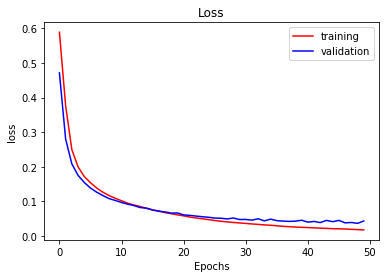

In [117]:
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='blue', label='validation')
plt.legend(loc='best')

In [118]:
acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

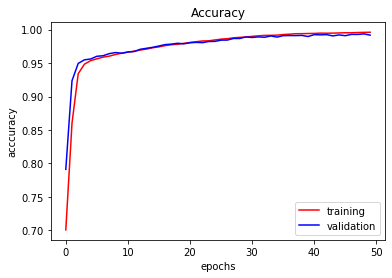

In [119]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('acccuracy')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='blue', label='validation')
plt.legend(loc='best')

## Neural network evaluation

In [120]:
final_model = Sequential()
final_model.add(Dense(units=100, input_dim=number_of_features, activation='relu'))
final_model.add(Dense(units=40, activation='relu'))
final_model.add(Dense(units=20, activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(units=output_size, activation='sigmoid'))
final_model.compile(optimizers.Adam(learning_rate = 0.0001), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])
final_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose = 1)

Epoch 1/50
1503/1503 [==============================] - 9s 6ms/step - loss: 0.5727 - accuracy: 0.6984
Epoch 2/50
1503/1503 [==============================] - 7s 4ms/step - loss: 0.3467 - accuracy: 0.8812
Epoch 3/50
1503/1503 [==============================] - 10s 7ms/step - loss: 0.2237 - accuracy: 0.9416
Epoch 4/50
1503/1503 [==============================] - 7s 5ms/step - loss: 0.1764 - accuracy: 0.9521
Epoch 5/50
1503/1503 [==============================] - 8s 6ms/step - loss: 0.1462 - accuracy: 0.9573
Epoch 6/50
1503/1503 [==============================] - 8s 5ms/step - loss: 0.1277 - accuracy: 0.9603
Epoch 7/50
1503/1503 [==============================] - 9s 6ms/step - loss: 0.1158 - accuracy: 0.9626
Epoch 8/50
1503/1503 [==============================] - 8s 5ms/step - loss: 0.1061 - accuracy: 0.9650
Epoch 9/50
1503/1503 [==============================] - 8s 6ms/step - loss: 0.0975 - accuracy: 0.9679
Epoch 10/50
1503/1503 [==============================] - 7s 5ms/step - loss: 0.08

In [121]:
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print ("Test loss: {}, test accuracy: {}".format(test_loss, test_accuracy))

741/741 [==============================] - 3s 4ms/step - loss: 0.0299 - accuracy: 0.9934
Test loss: 0.0298576932400465, test accuracy: 0.993412971496582


In [122]:
train_loss, train_accuracy = final_model.evaluate(X_train, y_train)
print ("Train loss: {}, train accuracy: {}".format(train_loss, train_accuracy))

1503/1503 [==============================] - 5s 3ms/step - loss: 0.0108 - accuracy: 0.9977
Train loss: 0.010781774297356606, train accuracy: 0.9977329969406128
